In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [5]:
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv('dataset.csv')
df.head()


Saving dataset.csv to dataset.csv


,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [7]:
# Check column names in the dataset
print("Column names:", df.columns.tolist())


Column names: ['Unnamed: 0', 'category', 'rating', 'label', 'text_']


In [8]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample cleaning function (no lemmatization needed here)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Apply to your 'text_' column
df['cleaned_review'] = df['text_'].apply(clean_text)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])

# Target variable
y = df['label']


In [9]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatize_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_spacy)


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

# Update X and y
X = df['cleaned_review']
y = df['encoded_label']

# Then split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on training data and transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))


SVM Accuracy: 0.8565599109682206
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      4016
           1       0.86      0.85      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



In [14]:
# Precision , Recall & f1 Score on whole dataset
from sklearn.metrics import precision_score, recall_score, f1_score

precision_svm = precision_score(y_test, svm_preds, average='weighted')
recall_svm = recall_score(y_test, svm_preds, average='weighted')
f1_svm = f1_score(y_test, svm_preds, average='weighted')

print("SVM Evaluation:")
print(f"  Precision: {precision_svm:.4f}")
print(f"  Recall:    {recall_svm:.4f}")
print(f"  F1 Score:  {f1_svm:.4f}")


SVM Evaluation:
  Precision: 0.8566
  Recall:    0.8566
  F1 Score:  0.8566


In [15]:
#Taking Input to check
import re
import string

# 1. Function to clean the input
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# 2. Take two inputs from user
print("Enter two product reviews:")
text1 = input("Review 1: ")
text2 = input("Review 2: ")

new_texts = [text1, text2]

# 3. Clean the texts
cleaned_new_texts = [clean_text(text) for text in new_texts]

# 4. Transform using the already-fitted vectorizer
new_texts_tfidf = vectorizer.transform(cleaned_new_texts)

# 5. Predict using the trained SVM model
predictions = svm_model.predict(new_texts_tfidf)

# 6. Output the results
for i, (text, pred) in enumerate(zip(new_texts, predictions)):
    label = "Genuine" if pred == 1 else "Fake"
    print(f"\nInput {i+1}: {text}")
    print(f"Prediction: {label}")


Enter two product reviews:
Review 1: return exchang twice base broken every time over
Review 2: just stun clean modern we month

Input 1: return exchang twice base broken every time over
Prediction: Fake

Input 2: just stun clean modern we month
Prediction: Genuine


In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.8293557561518486
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      4016
           1       0.86      0.79      0.82      4071

    accuracy                           0.83      8087
   macro avg       0.83      0.83      0.83      8087
weighted avg       0.83      0.83      0.83      8087



In [17]:
# Precision , Recall & f1 Score on whole dataset
precision_rf = precision_score(y_test, rf_preds, average='weighted')
recall_rf = recall_score(y_test, rf_preds, average='weighted')
f1_rf = f1_score(y_test, rf_preds, average='weighted')

print("Random Forest Evaluation:")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1 Score:  {f1_rf:.4f}")


Random Forest Evaluation:
  Precision: 0.8318
  Recall:    0.8294
  F1 Score:  0.8291


In [18]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))


Naive Bayes Accuracy: 0.8341783108692964
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      4016
           1       0.86      0.80      0.83      4071

    accuracy                           0.83      8087
   macro avg       0.84      0.83      0.83      8087
weighted avg       0.84      0.83      0.83      8087



In [19]:
# Precision , Recall & f1 Score on whole dataset
precision_nb = precision_score(y_test, nb_preds, average='weighted')
recall_nb = recall_score(y_test, nb_preds, average='weighted')
f1_nb = f1_score(y_test, nb_preds, average='weighted')

print("Naive Bayes Evaluation:")
print(f"  Precision: {precision_nb:.4f}")
print(f"  Recall:    {recall_nb:.4f}")
print(f"  F1 Score:  {f1_nb:.4f}")


Naive Bayes Evaluation:
  Precision: 0.8355
  Recall:    0.8342
  F1 Score:  0.8341


In [20]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)
knn_preds = knn_model.predict(X_test_tfidf)

print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))


KNN Accuracy: 0.5500185482873748
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.98      0.68      4016
           1       0.86      0.13      0.22      4071

    accuracy                           0.55      8087
   macro avg       0.69      0.55      0.45      8087
weighted avg       0.69      0.55      0.45      8087



In [21]:
# Precision , Recall & f1 Score on whole dataset
precision_knn = precision_score(y_test, knn_preds, average='weighted')
recall_knn = recall_score(y_test, knn_preds, average='weighted')
f1_knn = f1_score(y_test, knn_preds, average='weighted')

print("KNN Evaluation:")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall:    {recall_knn:.4f}")
print(f"  F1 Score:  {f1_knn:.4f}")


KNN Evaluation:
  Precision: 0.6919
  Recall:    0.5500
  F1 Score:  0.4511


In [22]:
#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)
xgb_preds = xgb_model.predict(X_test_tfidf)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8321998268826512
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4016
           1       0.82      0.86      0.84      4071

    accuracy                           0.83      8087
   macro avg       0.83      0.83      0.83      8087
weighted avg       0.83      0.83      0.83      8087



In [23]:
# Precision , Recall & f1 Score on whole dataset
precision_xgb = precision_score(y_test, xgb_preds, average='weighted')
recall_xgb = recall_score(y_test, xgb_preds, average='weighted')
f1_xgb = f1_score(y_test, xgb_preds, average='weighted')

print("XGBoost Evaluation:")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall:    {recall_xgb:.4f}")
print(f"  F1 Score:  {f1_xgb:.4f}")


XGBoost Evaluation:
  Precision: 0.8328
  Recall:    0.8322
  F1 Score:  0.8321


In [24]:
from sklearn.metrics import accuracy_score

print(" Model Comparison Summary:")
print("SVM Accuracy:           ", accuracy_score(y_test, svm_preds))
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_preds))
print("Naive Bayes Accuracy:   ", accuracy_score(y_test, nb_preds))
print("KNN Accuracy:           ", accuracy_score(y_test, knn_preds))
print("XGBoost Accuracy:       ", accuracy_score(y_test, xgb_preds))


 Model Comparison Summary:
SVM Accuracy:            0.8565599109682206
Random Forest Accuracy:  0.8293557561518486
Naive Bayes Accuracy:    0.8341783108692964
KNN Accuracy:            0.5500185482873748
XGBoost Accuracy:        0.8321998268826512


<ipython-input-26-d06c15a881e5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


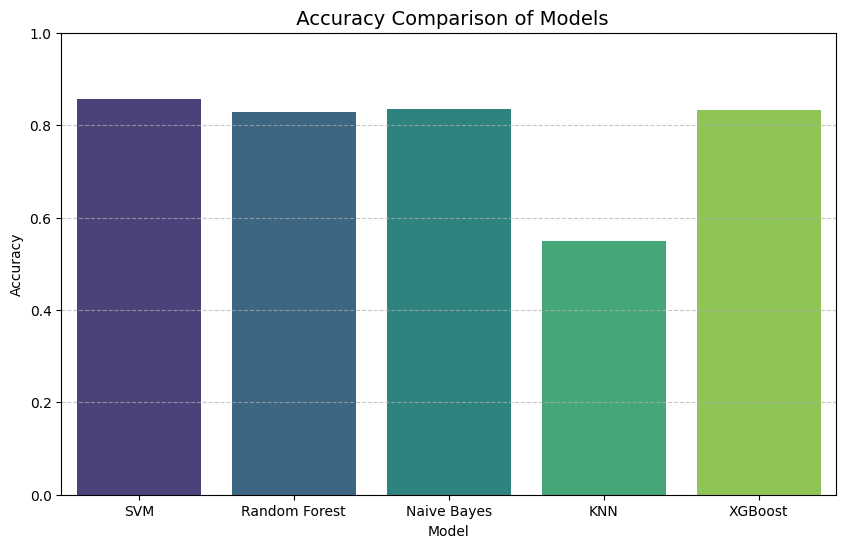

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Create dictionary of models and their accuracies
model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'KNN', 'XGBoost']
accuracies = [
    accuracy_score(y_test, svm_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, nb_preds),
    accuracy_score(y_test, knn_preds),
    accuracy_score(y_test, xgb_preds)
]

# Create a DataFrame for easy plotting
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.ylim(0, 1)
plt.title(' Accuracy Comparison of Models', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


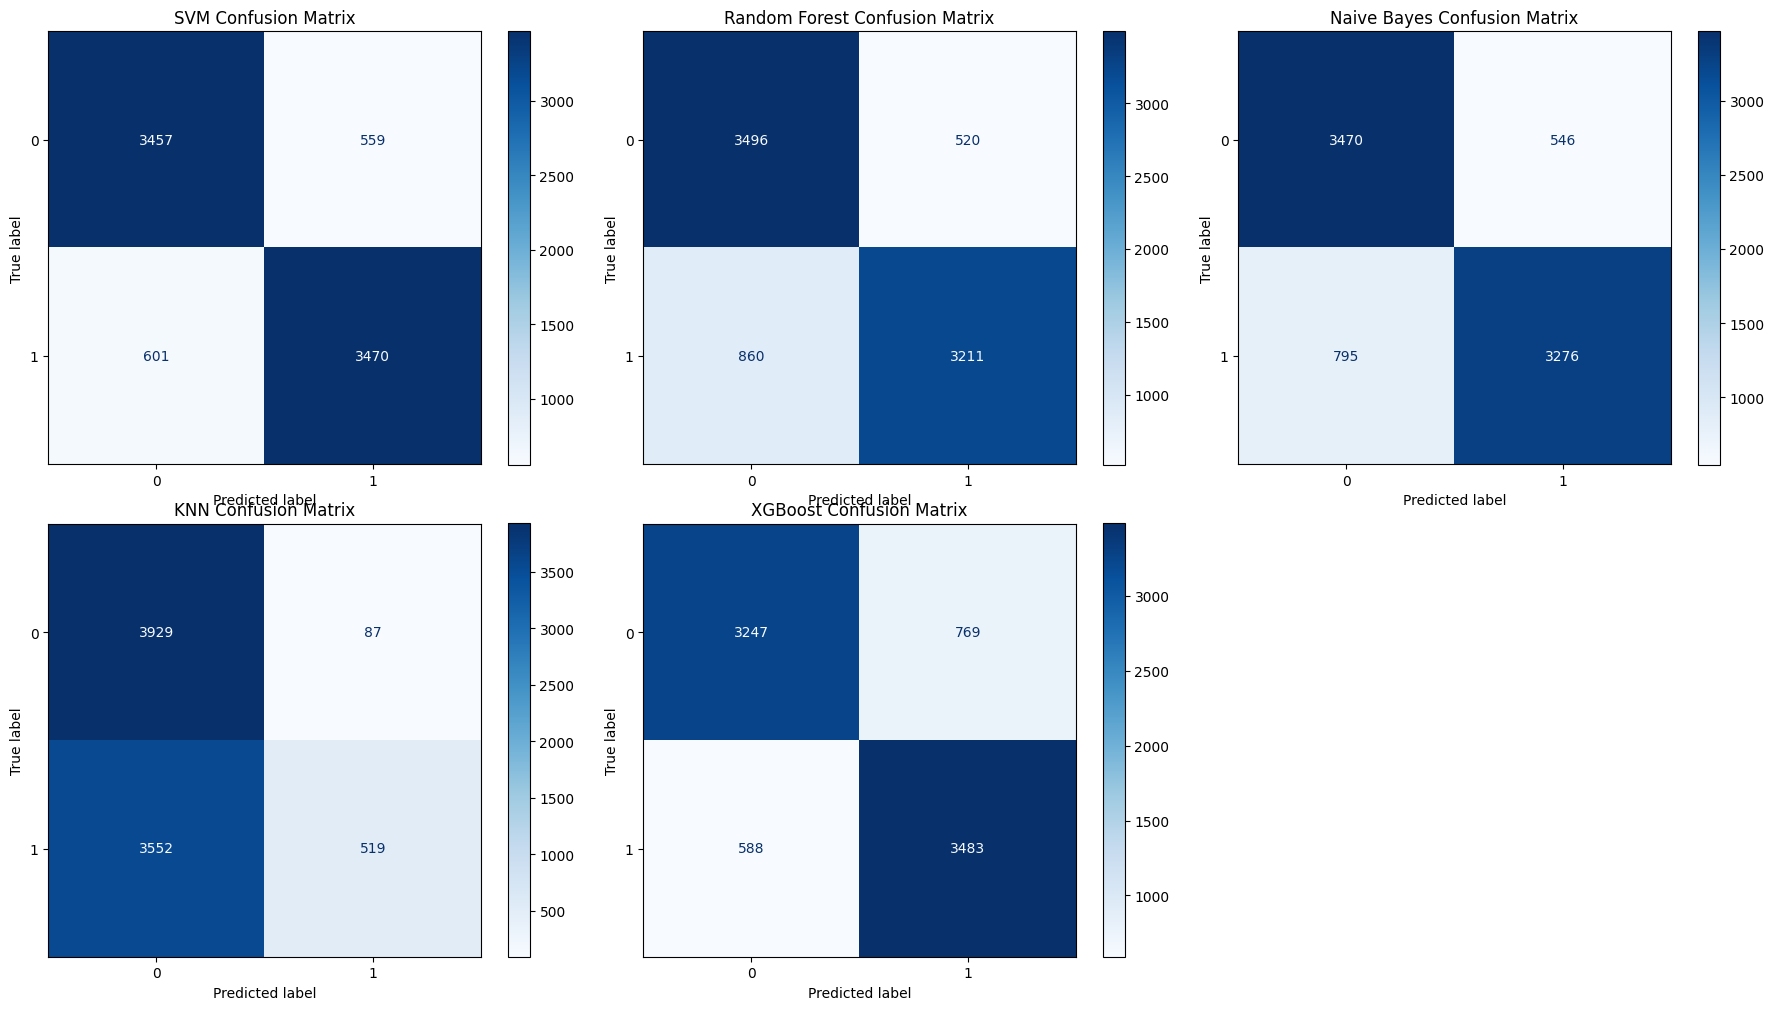

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    'SVM': svm_preds,
    'Random Forest': rf_preds,
    'Naive Bayes': nb_preds,
    'KNN': knn_preds,
    'XGBoost': xgb_preds
}

plt.figure(figsize=(18,10))
for i, (name, preds) in enumerate(models.items()):
    plt.subplot(2, 3, i+1)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=plt.gca(), cmap='Blues', values_format='d')
    plt.title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


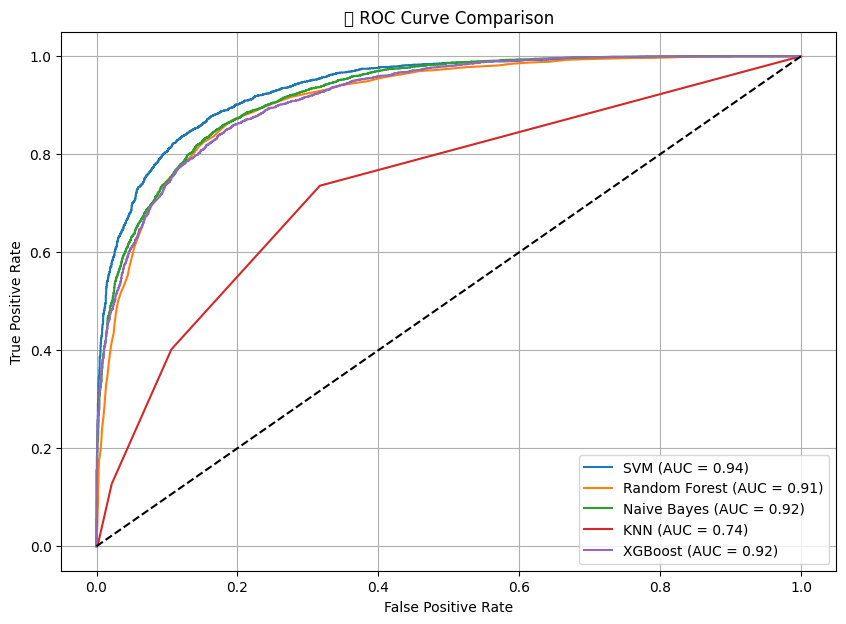

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize y for ROC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Probabilities for ROC
model_probs = {
    'SVM': svm_model.decision_function(X_test_tfidf),
    'Random Forest': rf_model.predict_proba(X_test_tfidf)[:,1],
    'Naive Bayes': nb_model.predict_proba(X_test_tfidf)[:,1],
    'KNN': knn_model.predict_proba(X_test_tfidf)[:,1],
    'XGBoost': xgb_model.predict_proba(X_test_tfidf)[:,1]
}

plt.figure(figsize=(10,7))
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test_bin, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('🚀 ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


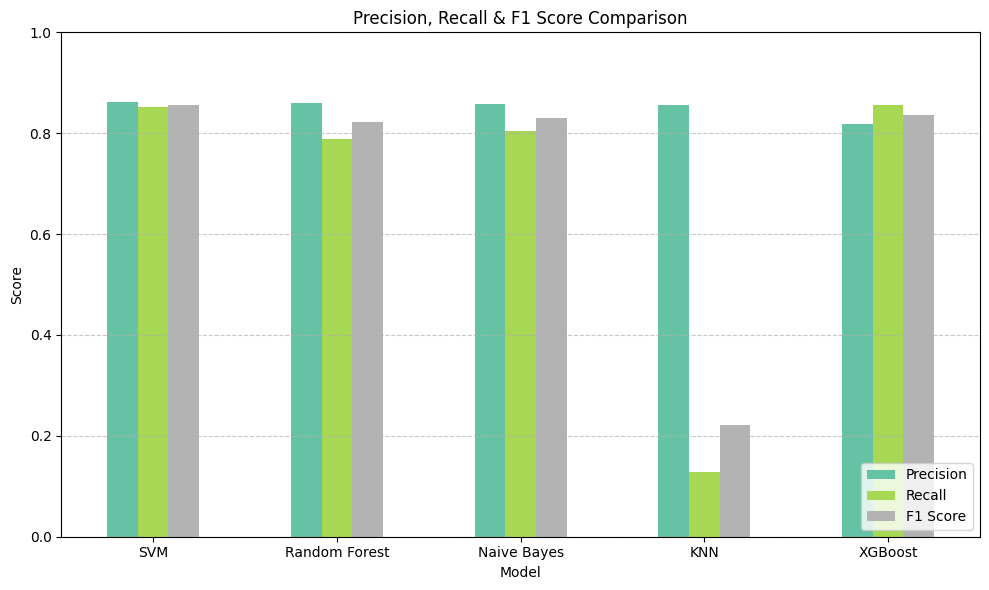

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

for preds in models.values():
    precision_scores.append(precision_score(y_test, preds))
    recall_scores.append(recall_score(y_test, preds))
    f1_scores.append(f1_score(y_test, preds))

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Plot grouped bar chart
metrics_df.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Precision, Recall & F1 Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Store models and their predictions
model_predictions = {
    "SVM": svm_preds,
    "Random Forest": rf_preds,
    "Naive Bayes": nb_preds,
    "KNN": knn_preds,
    "XGBoost": xgb_preds
}

# Evaluate each model
results = []

for model_name, preds in model_predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, pos_label=1, average='binary')
    recall = recall_score(y_test, preds, pos_label=1, average='binary')
    f1 = f1_score(y_test, preds, pos_label=1, average='binary')
    auc = roc_auc_score(y_test, preds)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": auc
    })

# Summary DataFrame
results_df = pd.DataFrame(results)
print("\n Model Evaluation Summary:")
print(results_df.sort_values(by=["F1 Score", "ROC-AUC"], ascending=False))

# Identify best model
best_model = results_df.sort_values(by=["F1 Score", "ROC-AUC"], ascending=False).iloc[0]
print(f"\n Best model to proceed with: **{best_model['Model']}** "
      f"(F1 Score: {best_model['F1 Score']:.4f}, ROC-AUC: {best_model['ROC-AUC']:.4f})")



 Model Evaluation Summary:
           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0            SVM  0.856560   0.861256  0.852370  0.856790  0.856589
4        XGBoost  0.832200   0.819144  0.855564  0.836958  0.832040
2    Naive Bayes  0.834178   0.857143  0.804716  0.830103  0.834380
1  Random Forest  0.829356   0.860627  0.788750  0.823122  0.829634
3            KNN  0.550019   0.856436  0.127487  0.221937  0.552912

 Best model to proceed with: **SVM** (F1 Score: 0.8568, ROC-AUC: 0.8566)
